# Formação Cientista de Dados
# Previsão de Séries Temporais (ARIMA)

In [1]:
pip install pmdarima

                                              0.0/566.2 kB ? eta -:--:--
     -------                                112.6/566.2 kB 3.3 MB/s eta 0:00:01
     -------------------------------        471.0/566.2 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 566.2/566.2 kB 3.3 MB/s eta 0:00:00
                                              0.0/988.3 kB ? eta -:--:--
     -----------------------------------   952.3/988.3 kB 30.4 MB/s eta 0:00:01
     ------------------------------------- 988.3/988.3 kB 15.8 MB/s eta 0:00:00
  Using cached urllib3-2.0.3-py3-none-any.whl (123 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
## pip install pmdarima
from pmdarima.arima import auto_arima

In [14]:
#conversão dos atributos que estão no formato string para o formato ano-mês
"""
O argumento date_parser vai ser descontinuando em versões futuras do pandas
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('../dados/AirPassengers.csv', parse_dates = ['Month'],
                   index_col = 'Month', date_parser = dateparse)
"""
data = pd.read_csv('../dados/AirPassengers.csv', parse_dates=['Month'], index_col='Month',
                   converters={'Event Date': lambda dates: dates.strptime('%Y-%m')})

In [15]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


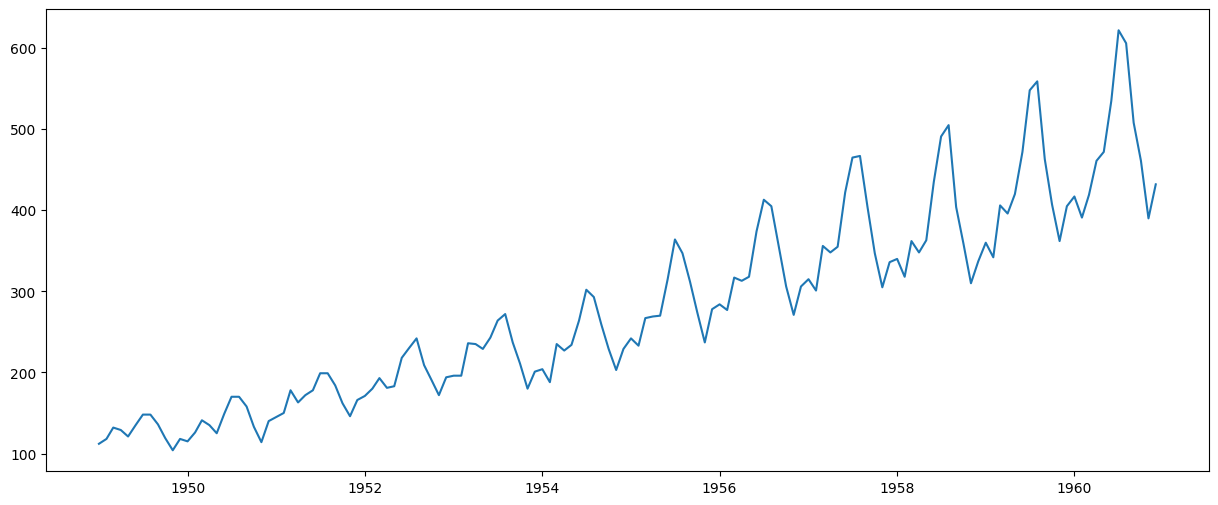

In [16]:
plt.plot(data)

In [17]:
stepwise_model = auto_arima(data, start_p=1,start_q=1,start_d= 0, start_P=0,
                            max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.45 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.27 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.69 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.16 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.40 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=0.89 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.36 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.79 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=3.29 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.35 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=0.95 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.19 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.65 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=2.21 sec
 ARIM

In [18]:
# Aic com o stepwise=True: 1019.1780567487502
print(stepwise_model.aic())

1012.9907964765356


In [19]:
train = data.loc['1949-01-01':'1959-12-01']
test = data.loc['1960-01-01':]

In [20]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [21]:
test

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [22]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [23]:
future_forecast = stepwise_model.predict(n_periods=12)

In [24]:
future_forecast

1960-01-01    420.252126
1960-02-01    398.476476
1960-03-01    461.923281
1960-04-01    450.707257
1960-05-01    474.018030
1960-06-01    537.912103
1960-07-01    612.216868
1960-08-01    623.562296
1960-09-01    520.172065
1960-10-01    462.332461
1960-11-01    412.953807
1960-12-01    453.775856
Freq: MS, dtype: float64

In [25]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["#Passengers"])

<Axes: xlabel='Month'>

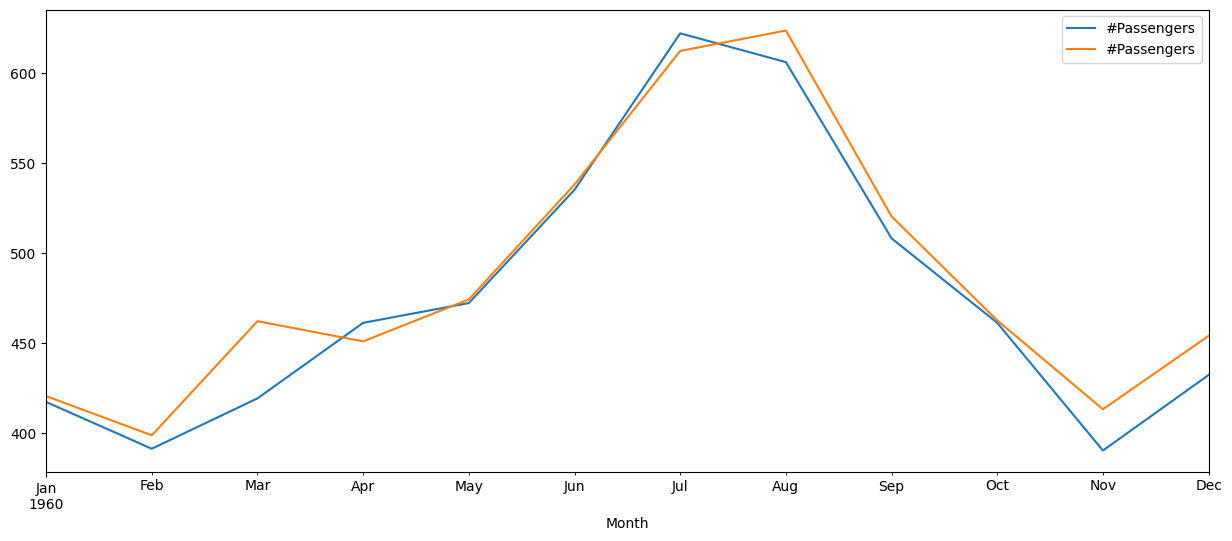

In [26]:
# Azul test laranja forecast
pd.concat([test,future_forecast],axis=1).plot()

<Axes: xlabel='Month'>

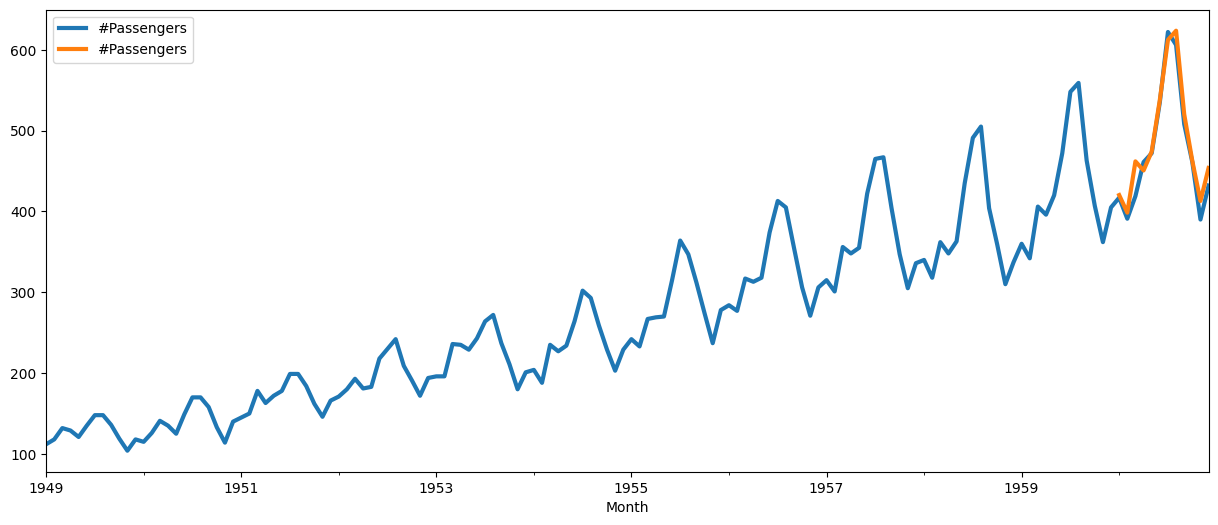

In [27]:
pd.concat([data,future_forecast],axis=1).plot(linewidth=3)